In [1]:
import sys
print('Python: {}'.format(sys.version))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [2]:
import scipy
print('Scipy: {}'.format(scipy.__version__))

Scipy: 1.3.1


In [3]:
import numpy
print('NumPpy: {}'.format(numpy.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

NumPpy: 1.16.5
Pandas: 0.25.1
Matplotlib: 3.1.1
Sklearn: 0.21.3


In [17]:
#import dependencies
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [18]:
#import dataset
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/datasets/master/iris.csv"
names = {'sepal-length', 'sepal-width', 'petal-length','petal-width', 'class'}
dt = pd.read_csv(url, names=names)

In [19]:
print(dt.shape)

(150, 5)


In [20]:
print(dt.head())

   sepal-width  petal-length  class  sepal-length  petal-width
0          5.1           3.5    1.4           0.2  Iris-setosa
1          4.9           3.0    1.4           0.2  Iris-setosa
2          4.7           3.2    1.3           0.2  Iris-setosa
3          4.6           3.1    1.5           0.2  Iris-setosa
4          5.0           3.6    1.4           0.2  Iris-setosa


In [21]:
print(dt.describe())

       sepal-width  petal-length       class  sepal-length
count   150.000000    150.000000  150.000000    150.000000
mean      5.843333      3.054000    3.758667      1.198667
std       0.828066      0.433594    1.764420      0.763161
min       4.300000      2.000000    1.000000      0.100000
25%       5.100000      2.800000    1.600000      0.300000
50%       5.800000      3.000000    4.350000      1.300000
75%       6.400000      3.300000    5.100000      1.800000
max       7.900000      4.400000    6.900000      2.500000


In [22]:
#class distribution
print(dt.groupby('class').size())

class
1.0     1
1.1     1
1.2     2
1.3     7
1.4    12
1.5    14
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64


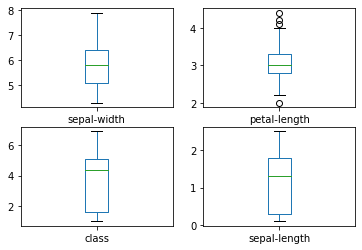

In [23]:
#univariate plots-box and whisker plots for data visualisation
dt.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

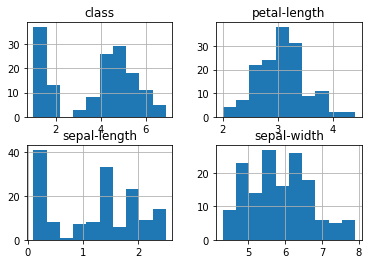

In [24]:
#histogram of the variable
dt.hist()
pyplot.show()

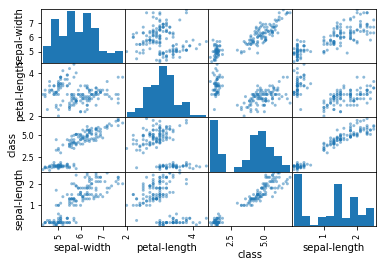

In [25]:
#multivariate plots
scatter_matrix(dt)
pyplot.show()

In [26]:
#creating validation dataset and splitting it
arr = dt.values
X = arr[:, 0:4]
y = arr[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
#Logistic Regression
#Linear Discriminant analysis
#K-Nearest Neighbors
#Classification and Regression Trees
#Gaussian Naive Bayes
#Support Vector Machines
#Builiding models
model =[]
model.append(('LR',LogisticRegression(solver='liblinear', multi_class='ovr')))

In [29]:
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('NB', GaussianNB()))
model.append(('SVM', SVC(gamma='auto')))

In [34]:
#Evaluate the created models
res = []
names = []
for name, models in model:
    Kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(models, X_train, Y_train, cv=Kfold, scoring='accuracy')
    res.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


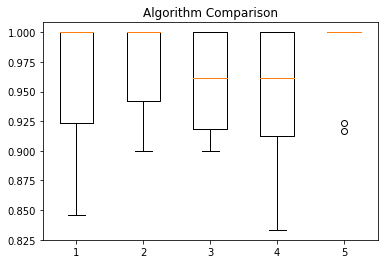

In [36]:
#Compare our models
pyplot.boxplot(res)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [37]:
#Make predictions on SVM
models = SVC(gamma='auto')
models.fit(X_train, Y_train)
pred = models.predict(X_validation)

In [38]:
#Evaluate the predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

